In [1]:
# Importing necessary imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
sns.set()

In [2]:
df = pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

## Cleaning Part

In [7]:
#Duplicates
df.duplicated().sum()

0

In [8]:
# missing value checks
df.isnull().sum().sum()

1009

In [9]:
# missing value checks
df.isnull().sum()/len(df)*100

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [11]:
df['rc'].mode()

0    5.2
Name: rc, dtype: object

In [12]:
#Finding the unique values in the given colomns
for i in df.columns:
    print('********************',i,'*********************')
    print()
    print(set(df[i].tolist()))
    print()

******************** id *********************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 21

In [13]:
df['pcv'] = df['pcv'].apply(lambda x:'41' if x == '\t?' else x)
df['pcv'] = df['pcv'].apply(lambda x:'43' if x == '\t43' else x)

In [14]:
df['pcv'].mode()[0]

'41'

In [15]:
df['wc'] = df['wc'].apply(lambda x:'6200' if x == '\t6200' else x)
df['wc'] = df['wc'].apply(lambda x:'8400' if x == '\t8400' else x)
df['wc'] = df['wc'].apply(lambda x:'9800' if x == '\t?' else x)

In [16]:
df['wc'].mode()

0    9800
Name: wc, dtype: object

In [17]:
df['rc'] = df['rc'].apply(lambda x:'5.2' if x == '\t?' else x)

In [18]:
df['classification'] = df['classification'].apply(lambda x:'ckd' if x == 'ckd\t' else x)

In [19]:
df['cad'] = df['cad'].apply(lambda x:'no' if x == '\tno' else x)

In [20]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x == '\tyes' else x)
df['dm'] = df['dm'].apply(lambda x:'no' if x == '\tno' else x)
df['dm'] = df['dm'].apply(lambda x:'yes' if x == ' yes' else x)


In [21]:
df['dm'] = df['dm'].apply(lambda x:'yes' if x == '\tyes' else x)


In [22]:
print(df['pcv'].mode()[0])
print()
print(df['wc'].mode()[0])
print()
print(df['rc'].mode()[0])

41

9800

5.2


In [23]:
df['pcv'] = df['pcv'].fillna(df['pcv'].mode()[0])
df['wc'] = df['wc'].fillna(df['wc'].mode()[0])
df['rc'] = df['rc'].fillna(df['rc'].mode()[0])

In [24]:
df['pcv'] = df['pcv'].astype('int64')
df['rc'] = df['rc'].astype('float64')
df['wc'] = df['wc'].astype('int64')

In [25]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 int64
wc                  int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [26]:
Object_Columns = df.select_dtypes(include=['object']).columns
print("Object type Columns :")
print(Object_Columns)


Numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical type columns")
print(Numerical_columns)

Object type Columns :
Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

Numerical type columns
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')


In [27]:

# Imputers
imp_mode1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')  # Most frequent - Mode Opration
imp_mode2 = SimpleImputer(missing_values=np.nan, strategy='median')

# Impute categorical columns
df_imp1 = pd.DataFrame(imp_mode1.fit_transform(df[Object_Columns]))
df_imp1.columns = df[Object_Columns].columns

# Impute numerical columns
df_imp2 = pd.DataFrame(imp_mode2.fit_transform(df[Numerical_columns]))
df_imp2.columns = df[Numerical_columns].columns

In [28]:
print(df_imp1.isnull().sum().sum())
print()
print(df_imp2.isnull().sum().sum())

0

0


In [29]:
df_imp1

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,notckd


In [30]:
df_imp2

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,0.0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,1.0,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,2.0,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,3.0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,4.0,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,396.0,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,397.0,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,398.0,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [31]:
# Id is a not valuable column saw drop it 
df_imp2.drop(columns=['id'], inplace=True)

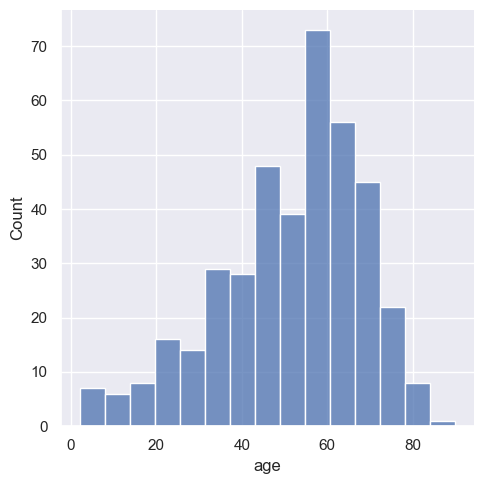

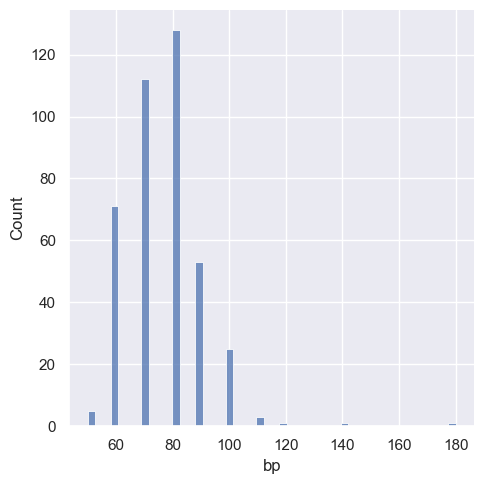

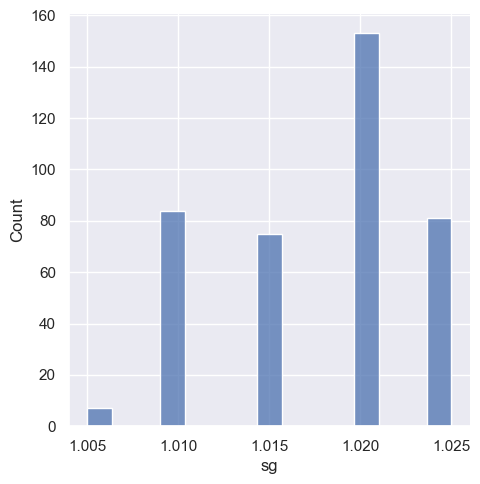

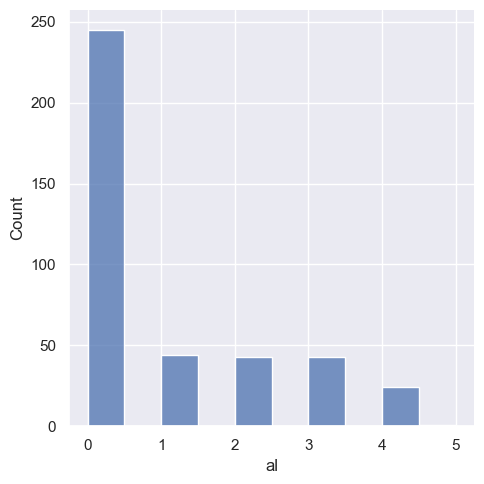

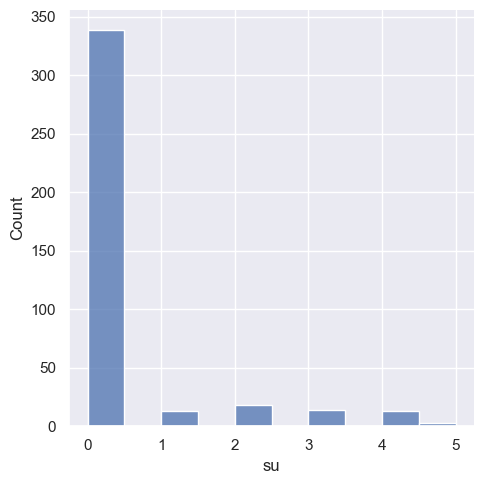

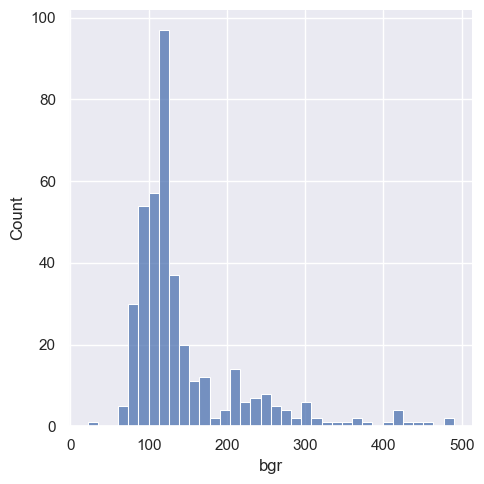

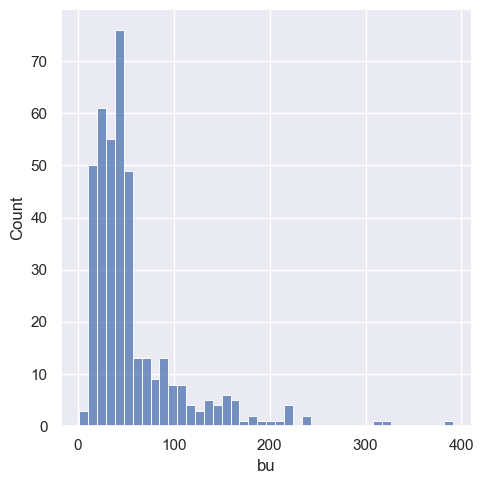

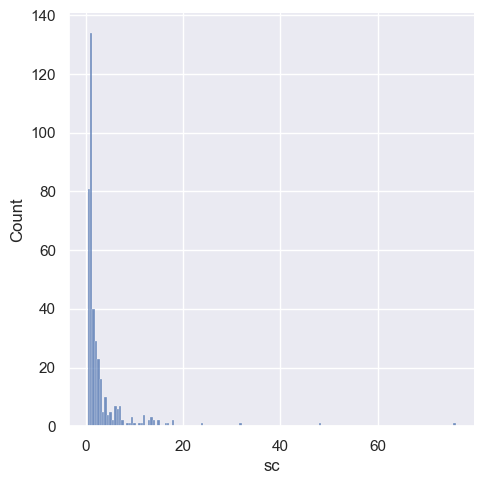

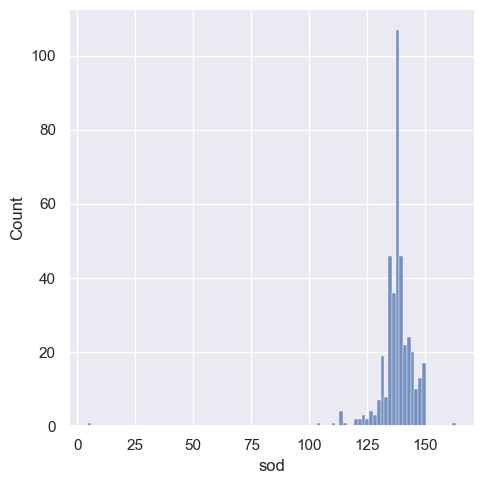

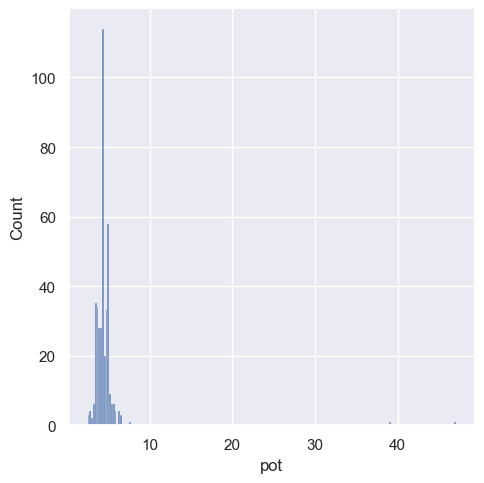

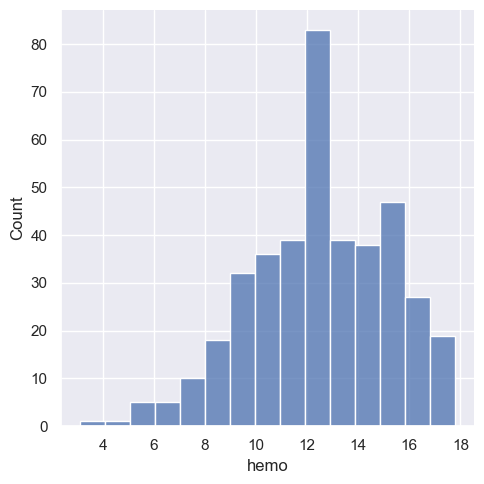

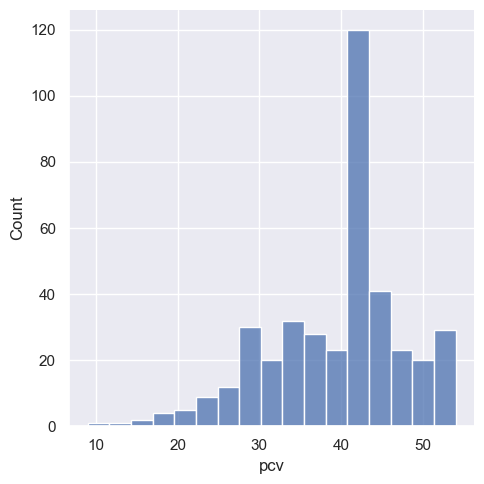

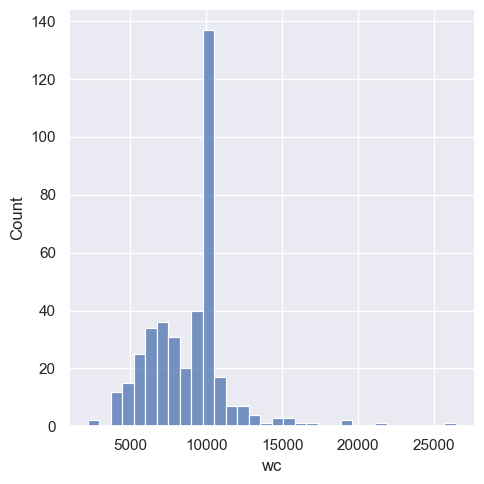

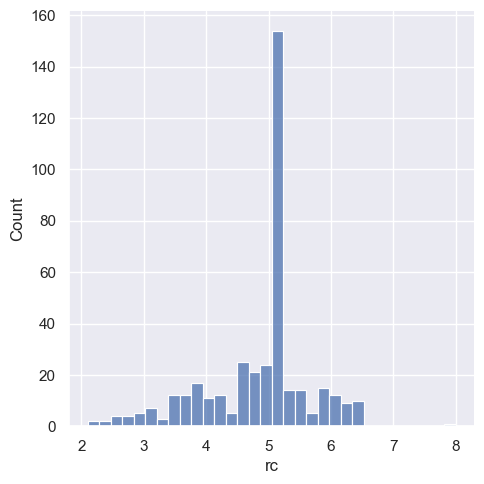

In [32]:
# Checking Outlier
def displot(col):
    sns.displot(df_imp2[col])
    plt.show()
for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    displot(i)

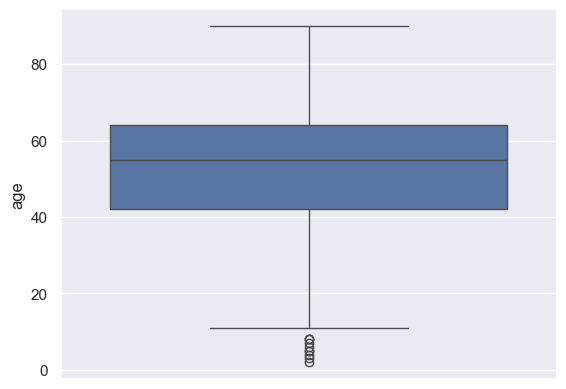

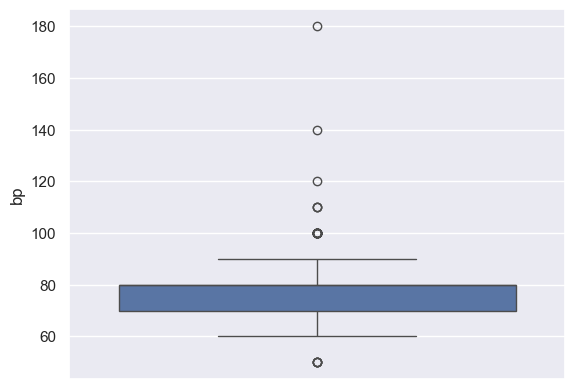

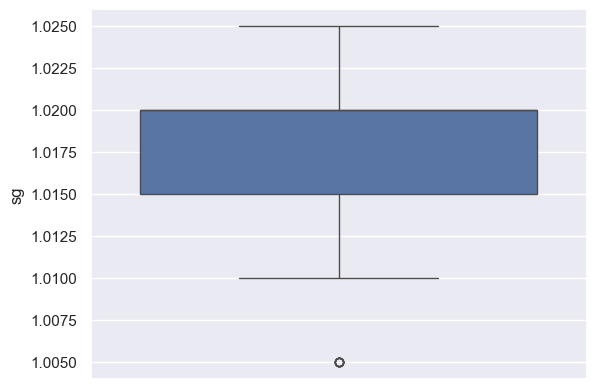

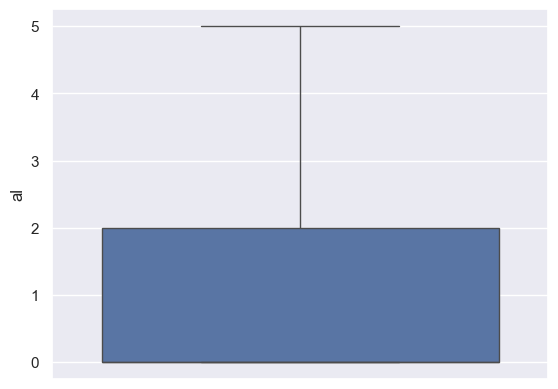

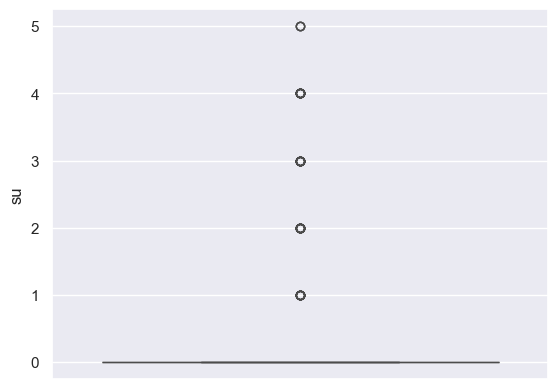

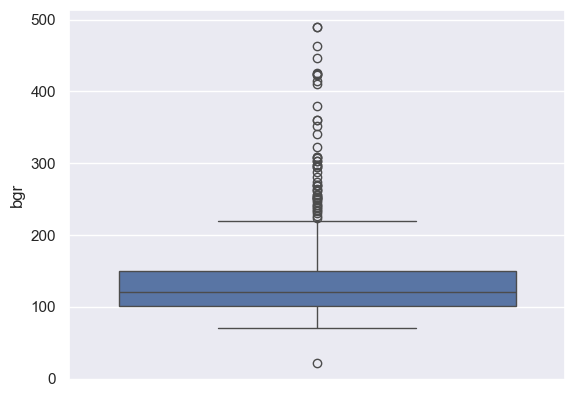

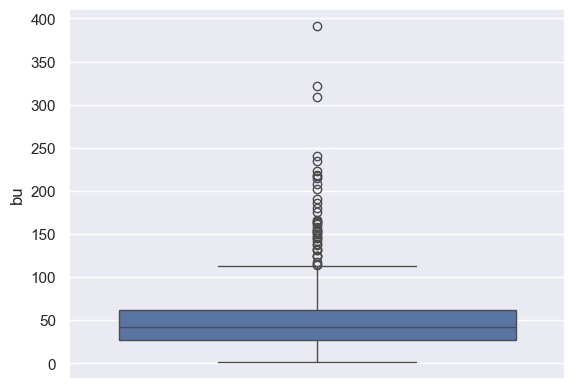

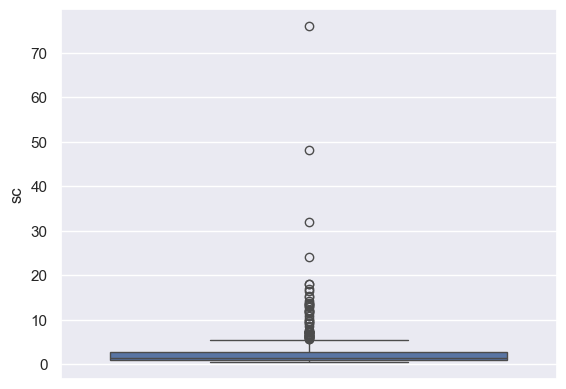

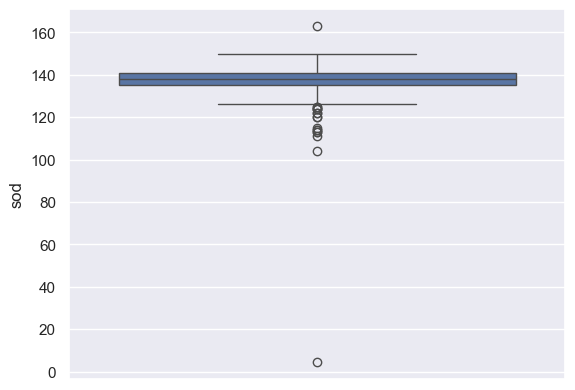

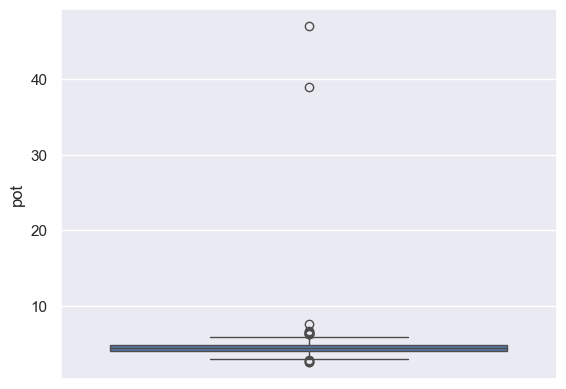

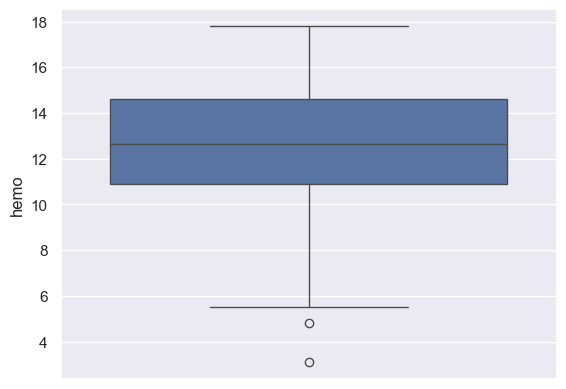

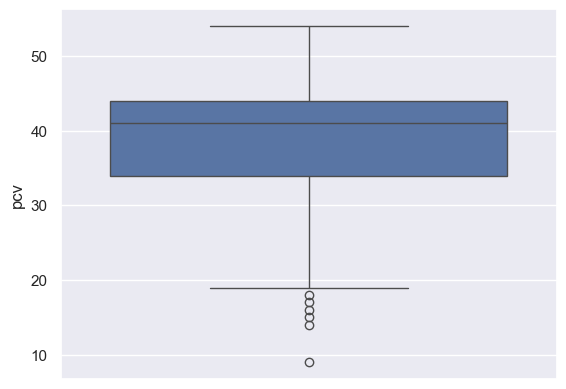

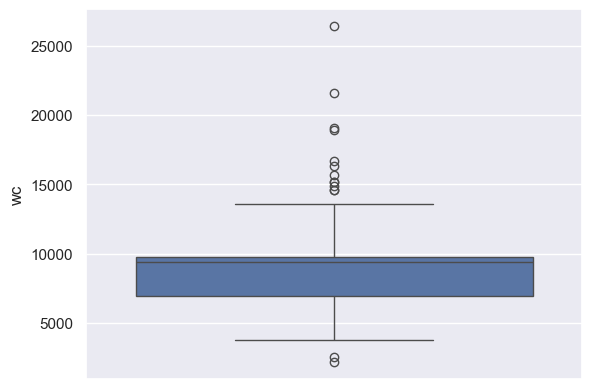

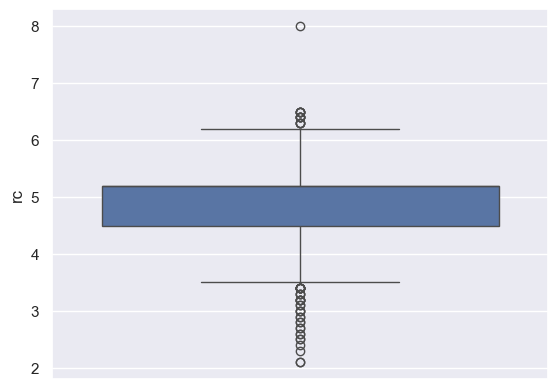

In [33]:
# Checking Outlier
def boxplot(col):
    sns.boxplot(df_imp2[col])
    plt.show()
for i in list(df_imp2.select_dtypes(exclude=['object']).columns)[0:]:
    boxplot(i)

In [34]:
df_imp1.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [35]:
df_imp2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [36]:
table_merge = pd.concat([df_imp1,df_imp2], axis=1)

In [37]:
table_merge

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9


In [38]:
#split the data into independent variables
x = table_merge.drop('classification', axis=1)
y=table_merge['classification']

In [39]:
x.columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [40]:
y = np.where(y=='ckd', 1,0)

In [41]:
y = pd.DataFrame(y)
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [42]:
y.column = ['classification']
y

,0
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [43]:
# Handling Encoding concept
def classify_features(x):
    categorical_features = []
    non_categorical_features = []
    descrete_features = []
    contionus_features = []
    for column in x.columns:
        if x [column].dtype == 'object':
                if x[column].nunique() < 10:
                    categorical_features.append(column)
                else:
                    non_categorical_features.append(column)
        elif x[column].dtype in ['int64','float64']:
                if x[column].nunique() < 10:
                    descrete_features.append(column)
                else:
                    contionus_features.append(column)
    return categorical_features, non_categorical_features, descrete_features, contionus_features
                

In [44]:
categorical, non_categorical,descrete,contionus = classify_features(x)

In [45]:
categorical

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [46]:
non_categorical

[]

In [47]:
descrete

['sg', 'al', 'su']

In [48]:
contionus

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

- Nominal Data → One-hot encoding is best because there’s no order.
- Ordinal Data → Label encoding works well because values have a ranking.


In [50]:
!pip install dtale

In [51]:
import sys
print(sys.path)

['C:\\Users\\rashe\\capstone project', 'E:\\python\\python312.zip', 'E:\\python\\DLLs', 'E:\\python\\Lib', 'E:\\python', '', 'E:\\python\\Lib\\site-packages', 'E:\\python\\Lib\\site-packages\\win32', 'E:\\python\\Lib\\site-packages\\win32\\lib', 'E:\\python\\Lib\\site-packages\\Pythonwin']


In [52]:
pip show dtale

Name: dtale
Version: 3.17.0
Summary: Web Client for Visualizing Pandas Objects
Home-page: https://github.com/man-group/dtale
Author: MAN Alpha Technology
Author-email: ManAlphaTech@man.com
License: LGPL
Location: E:\python\Lib\site-packages
Requires: beautifulsoup4, certifi, cycler, dash, dash-bootstrap-components, dash-daq, et-xmlfile, Flask, Flask-Compress, future, itsdangerous, kaleido, lz4, matplotlib, missingno, networkx, numpy, openpyxl, pandas, plotly, requests, scikit-learn, scipy, seaborn, six, squarify, statsmodels, strsimpy, werkzeug, xarray, xlrd
Required-by: 
Note: you may need to restart the kernel to use updated packages.


# EDA

In [54]:
import dtale
dtale.show(df)

In [55]:
for i in categorical:
    print(x[i].value_counts())
    print()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

pc
normal      324
abnormal     76
Name: count, dtype: int64

pcc
notpresent    358
present        42
Name: count, dtype: int64

ba
notpresent    378
present        22
Name: count, dtype: int64

htn
no     253
yes    147
Name: count, dtype: int64

dm
no     263
yes    137
Name: count, dtype: int64

cad
no     366
yes     34
Name: count, dtype: int64

appet
good    318
poor     82
Name: count, dtype: int64

pe
no     324
yes     76
Name: count, dtype: int64

ane
no     340
yes     60
Name: count, dtype: int64



In [56]:
 df_dummies = pd.get_dummies(x[categorical], drop_first=True)

In [57]:
x[categorical]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [58]:
df_dummies

,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,True,True,False,False,True,True,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,True,True,False,False,False,True,False,True,False,True
3,True,False,True,False,True,False,False,True,True,True
4,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
395,True,True,False,False,False,False,False,False,False,False
396,True,True,False,False,False,False,False,False,False,False
397,True,True,False,False,False,False,False,False,False,False
398,True,True,False,False,False,False,False,False,False,False


In [59]:
df_dummies1 = np.where(df_dummies[0:]==True,1,0)
df_dummies1  

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

In [60]:
df_dummies = pd.DataFrame(df_dummies)  # Ensure it's a DataFrame
df_dummies1 = pd.DataFrame(df_dummies1, columns=df_dummies.columns)

In [61]:
df_imp1 = pd.concat([x.drop(columns=categorical), df_dummies1], axis=1)

In [62]:
df_imp1.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,138.0,4.4,...,1,1,0,0,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,121.0,18.0,0.8,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,138.0,4.4,...,1,1,0,0,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.0,4.4,...,1,1,0,0,0,0,0,0,0,0


In [63]:
df_imp1.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,...,0.882500,0.810000,0.105000,0.055000,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,...,0.322418,0.392792,0.306937,0.228266,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


# Preprocessing Part
1. Part 1 - Missing Vlalues Treatment done
2. part 2 - encoding part done (char Variable)
3. part 3 - Outlier Part (Numerical Variable)
4. Part 4 - Feature scaling (normalization or standerdization) - Depends basis the result
5. Part 5 - Imabalance Treatment(this is only application with classification problem)

In [65]:
pd.DataFrame(y).value_counts(normalize=True)

0
1    0.625
0    0.375
Name: proportion, dtype: float64

# Split the data into train and test

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_imp1, y, test_size=0.2, random_state=42, stratify=y)


In [68]:
pd.DataFrame(y_train).value_counts()

0
1    200
0    120
Name: count, dtype: int64

In [69]:
pd.DataFrame(y_test).value_counts()

0
1    50
0    30
Name: count, dtype: int64

# Building Machine Learning (Traditional Algorithm)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#Evaluation Matrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

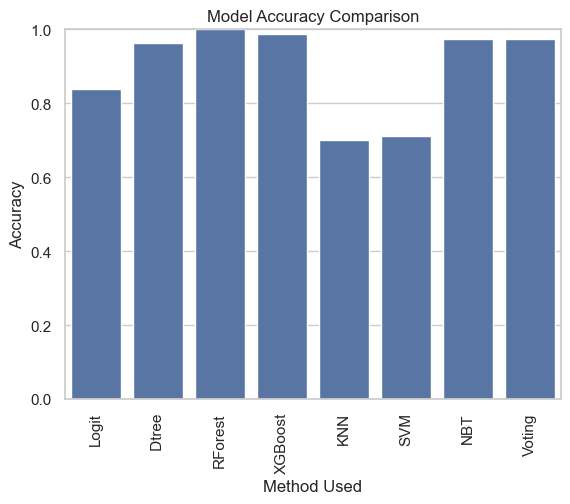

  Method Used  Accuracy
0       Logit    0.8375
1       Dtree    0.9625
2     RForest    1.0000
3     XGBoost    0.9875
4         KNN    0.7000
5         SVM    0.7125
6         NBT    0.9750
7      Voting    0.9750


In [72]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lists to store results
list1 = []
list2 = []
list3 = []

# Logistic Regression
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Random Forest
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# SVM (Fix: probability=True for compatibility with ensemble)
svm = SVC(probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Bayes
nbt = GaussianNB()
nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

model_evc = VotingClassifier(estimators=[
    ('logit', logit),
    ('dtree', dtree),
    ('rforest', rforest),
    ('xgboost', xgboost),  # ✅ make sure this is an instance
    ('knn', knn),
    ('svm', svm),
    ('nbt', nbt)
], voting='hard')


model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

# Collecting results
list1 = ['Logit', ' Dtree', 'RForest', 'XGBoost', 'KNN', 'SVM', 'NBT', 'Voting']
list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xg, accuracy_knn, accuracy_svm, accuracy_nbt, accuracy_evc]
list3 = [logit, dtree, rforest, xgboost, knn, svm, nbt, model_evc]

df_accuracy = pd.DataFrame({"Method Used": list1, "Accuracy": list2})

# Plotting the results
sns.set(style="whitegrid")
chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

# Printing accuracy dataframe
print(df_accuracy)


In [73]:
# Checking Underfitting and Over Fitting Problem(high bias or high variance problem) - Bias Varience Trade off 

In [74]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print('******************')
print("train accuracy", accuracy_evc_train)
print('******************')
print("test accuracy", accuracy_evc_test)


******************
train accuracy 1.0
******************
test accuracy 0.975


# Cross Validation


In [76]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc, x_train, y_train, cv=10)
print("Training Accuracy :",training .mean())
print("*************")
print("test accuracy", accuracy_evc_test)


Training Accuracy : 0.984375
*************
test accuracy 0.975


In [77]:
# Classification Report
print("****************")
print("Training Accuracy :",classification_report(y_train,pred_evc_train))
print("****************")
print("Test Accuracy :",classification_report(y_test,pred_evc_test))

****************
Training Accuracy :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       200

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

****************
Test Accuracy :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.98      0.98      0.98        50

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [78]:
# Confusion Matrix
print("****************")
print(confusion_matrix(y_train,pred_evc_train))
print("****************")
print(confusion_matrix(y_test,pred_evc_test))

****************
[[120   0]
 [  0 200]]
****************
[[29  1]
 [ 1 49]]


In [79]:
cleaned_dataset = pd.concat([table_merge, y], axis=1)
cleaned_dataset

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,0
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,5.2,1
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,5.2,1
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0


In [80]:
cleaned_dataset.to_csv("cleaned_dataset.csv")

In [81]:
y.columns

RangeIndex(start=0, stop=1, step=1)